# MQA performance evaluation for pisces_multidomain100_identity95_coverage60

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
def scatter(df, x='GDT_TS', y='Proposed', col_wrap=4):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='target', col_wrap=col_wrap)
    g.set(xlim=(0, 1), ylim=(0, 1))
    plt.subplots_adjust(wspace=0.1)

In [3]:
# boxplot and swarmplot for each group
def plot_metrics_group(df, metrics, hue=None, figsize=(10, 8), pointsize=4, order=None, hue_order=None):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x=metrics, y='Method', orient='h', color='white', order=order)
    sns.swarmplot(data=df, x=metrics, y='Method', orient='h', hue=hue, size=pointsize, palette='Set2', order=order, hue_order=hue_order)
    plt.tight_layout()

In [4]:
from pathlib import Path
dataset_name = 'pisces_multidomain100_identity95_coverage60'
score_dir = Path('../../../../score') / dataset_name
plot_dir = score_dir / 'plot' / 'MQA'
plot_dir.mkdir(parents=True, exist_ok=True)
# model score
tmscore_path = (score_dir / (dataset_name + '_final')).with_suffix('.csv')
tmscore_df = pd.read_csv(tmscore_path, index_col=0)
alignment_quality_row_columns = ['identity', 'positive', 'coverage', 'identity(-misres)', 'positive(-misres)', 'coverage(-misres)']
alignment_quality_columns = [c + '(%)' for c in alignment_quality_row_columns]
for c in alignment_quality_row_columns:
    tmscore_df[c + '(%)'] = tmscore_df[c] / tmscore_df['seq_len']
p3cmqa_df = pd.read_csv(score_dir / 'P3CMQA.csv', index_col=0).rename({'Score': 'P3CMQA'}, axis=1)
dope_df = pd.read_csv(score_dir / 'dope.csv', index_col=0)
proq3_df = pd.read_csv(score_dir / 'proq3.csv', index_col=0)
sbrod_df = pd.read_csv(score_dir / 'sbrod.csv', index_col=0)
dan_df = pd.read_csv(score_dir / 'DeepAccNet.csv', index_col=0)
method_df = pd.concat([p3cmqa_df, dope_df, dan_df, sbrod_df, proq3_df], axis=1)
df = pd.merge(tmscore_df, method_df, left_on='model', right_index=True)
df['dope'] = - df['dope']
df['soap'] = - df['soap']
rename_dict = {name: name.upper() for name in ['dope', 'soap', 'sbrod']}
df = df.rename(rename_dict, axis=1)
df.to_csv(score_dir / (dataset_name + '_final_all_score.csv'))
df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
105    1FHU_A_2PS2_A_3_3   0.452   0.265    0.649  1FHU_A  2PS2_A_3      320   
106    1FHU_A_4MGG_A_3_4   0.494   0.309    0.657  1FHU_A  4MGG_A_3      320   
107    1FHU_A_1WUF_A_3_3   0.557   0.353    0.752  1FHU_A  1WUF_A_3      320   
108    1FHU_A_3Q45_A_3_2   0.572   0.370    0.758  1FHU_A  3Q45_A_3      320   
109    1FHU_A_3GC2_A_1_2   0.972   0.865    0.986  1FHU_A  3GC2_A_1      320   
...                  ...     ...     ...      ...     ...       ...      ...   
17831  6RI6_A_5A7E_A_1_3   0.954   0.873    0.982  6RI6_A  5A7E_A_1      498   
17832  6RI6_A_5A7E_A_2_4   0.960   0.886    0.986  6RI6_A  5A7E_A_2      498   
17833  6RI6_A_4A2F_A_1_5   0.955   0.872    0.981  6RI6_A  4A2F_A_1      498   
17834  6RI6_A_2HRG_A_2_1   0.961   0.890    0.985  6RI6_A  2HRG_A_2      498   
17835  6RI6_A_2XYB_A_2_4   0.960   0.878    0.986  6RI6_A  2XYB_A_2      498   

       identity  positive  coverage  ...  P3CMQA      DOPE       SOAP  \
105          53       102       282  ...   0.515 27283.328  33152.531   
106          56       107       278  ...   0.482 27319.707  38548.465   
107          54       114       299  ...   0.519 28419.498  86647.062   
108          61       108       301  ...   0.608 29572.854  80894.781   
109         276       291       319  ...   0.971 37308.680 214635.547   
...         ...       ...       ...  ...     ...       ...        ...   
17831       338       387       490  ...   0.945 58234.910 424469.656   
17832       335       382       494  ...   0.965 58258.246 431983.438   
17833       339       386       490  ...   0.948 58857.711 414417.062   
17834       333       383       494  ...   0.958 58947.844 437209.344   
17835       330       377       492  ...   0.955 58731.055 418580.875   

       DeepAccNet DeepAccNet-Bert SBROD  ProQ2D ProQRosCenD  ProQRosFAD  \
105         0.282           0.413 1.468   0.481       0.469       0.527   
106         0.301           0.414 1.418   0.459       0.451       0.556   
107         0.337           0.440 1.510   0.472       0.552       0.633   
108         0.347           0.460 1.461   0.511       0.545       0.696   
109         0.832           0.748 1.707   0.694       0.762       0.934   
...           ...             ...   ...     ...         ...         ...   
17831       0.748           0.765 1.836   0.700       0.759       0.925   
17832       0.748           0.756 1.851   0.704       0.763       0.933   
17833       0.761           0.778 1.855   0.682       0.749       0.932   
17834       0.756           0.769 1.854   0.673       0.745       0.924   
17835       0.780           0.793 1.846   0.676       0.740       0.919   

       ProQ3D  
105     0.467  
106     0.457  
107     0.526  
108     0.607  
109     0.821  
...       ...  
17831   0.812  
17832   0.828  
17833   0.823  
17834   0.818  
17835   0.805  

[14040 rows x 43 columns]

In [5]:
df.value_counts('target').sort_values()[: 20]

target
5ICQ_A     55
3A09_A     61
3UCQ_A     67
4DCU_A     70
4JBE_A     75
4R6H_A     77
5IPY_A     80
2XXG_A     92
1GU7_A     97
1ZAR_A    100
5DVI_A    102
5V8S_A    109
2HEU_A    116
4TMX_A    121
2BHU_A    125
1FHU_A    134
6HOA_A    138
4CFS_A    140
3PJ0_A    140
4BVX_A    145
dtype: int64

In [6]:
target_info_df = df.groupby('target').head(1)[['target', 'Domain_num', 'seq_len']]
target_info_df

target  Domain_num  seq_len
105    1FHU_A           2      320
239    1GU7_A           2      364
336    1HM9_B           2      468
616    1K5N_A           2      276
766    1L3K_A           2      196
...       ...         ...      ...
17102  6D0A_A           2      431
17252  6FME_B           3      506
17398  6G7N_A           2      318
17548  6HOA_A           2      228
17686  6RI6_A           3      498

[100 rows x 3 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14040 entries, 105 to 17835
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 14040 non-null  object 
 1   GDT_TS                14040 non-null  float64
 2   GDT_HA                14040 non-null  float64
 3   TMscore               14040 non-null  float64
 4   target                14040 non-null  object 
 5   template              14040 non-null  object 
 6   seq_len               14040 non-null  int64  
 7   identity              14040 non-null  int64  
 8   positive              14040 non-null  int64  
 9   coverage              14040 non-null  int64  
 10  identity(-misres)     14040 non-null  int64  
 11  positive(-misres)     14040 non-null  int64  
 12  coverage(-misres)     14040 non-null  int64  
 13  num_misres            14040 non-null  int64  
 14  Method                14040 non-null  object 
 15  IDs              

In [8]:
df[df['DeepAccNet-Bert'].isnull()].value_counts('target')

target
3P2T_A    9
4RD4_A    9
4WPG_A    8
3PPL_A    8
4YKI_A    6
3VQT_A    5
6D0A_A    5
3AML_A    5
4XH2_G    5
3PIU_A    5
4I8H_A    5
4G68_A    5
4A5S_A    4
1R6D_A    4
3VRD_B    4
3QGU_B    4
3K6Y_A    4
1RKX_A    3
3SQZ_A    3
4YUC_A    3
1SVS_A    3
6RI6_A    2
3G7Q_A    1
2IZR_A    1
dtype: int64

## performance evaluation

In [9]:
import sys
sys.path.append('../../../mqa')
from eval import eval, eval_get_df

In [10]:
column_template = alignment_quality_columns
eval(df, columns=column_template, label_name='GDT_TS')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  \
0           identity(%)           0.787            0.551        4.885   
1           positive(%)           0.805            0.577        4.410   
2           coverage(%)           0.424            0.387       16.252   
3  identity(-misres)(%)           0.797            0.570        4.774   
4  positive(-misres)(%)           0.817            0.607        4.634   
5  coverage(-misres)(%)           0.435            0.412       16.795   

   GDT_TS MAE  
0       0.318  
1       0.171  
2       0.285  
3       0.323  
4       0.176  
5       0.279

In [11]:
# column_name = ['P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert', 'ProQ3D', 'ProQ2D','sbrod', 'dope', 'soap', 'identity(%)', 'positive(%)', 'coverage(%)']
column_name = ['identity(%)', 'positive(%)', 'coverage(%)', 'DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'DeepAccNet', 'DeepAccNet-Bert', 'P3CMQA']
pef_df = eval(df, columns=column_name, label_name='GDT_TS')
pef_df.to_csv(score_dir / 'mqa_result.csv')
pef_df

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.787            0.551        4.885       0.318
1      positive(%)           0.805            0.577        4.410       0.171
2      coverage(%)           0.424            0.387       16.252       0.285
3             DOPE           0.809            0.712        2.468         NaN
4             SOAP           0.741            0.620        2.921         NaN
5           ProQ3D           0.817            0.723        3.587       0.095
6            SBROD           0.785            0.676        3.684         NaN
7       DeepAccNet           0.858            0.734        2.873       0.194
8  DeepAccNet-Bert           0.882            0.788        2.760       0.142
9           P3CMQA           0.884            0.802        1.884       0.075

In [12]:
# remove target that have similarity to target of CASP7-10
scop_over_lap_path = '../../../mqa/P3CMQA/train_overlap/pisces_overlap.csv'
overlap_df = pd.read_csv(scop_over_lap_path, header=None)
target_unique_list = df['target'].unique()
overlapped_target = [id[: 4].upper() + id[4:] for id in overlap_df[0]]
overlapped_target = [target for target in overlapped_target if target in target_unique_list]
print(overlapped_target)
del_df = df.query('target not in @overlapped_target')
pef_df = eval(del_df, columns=column_name, label_name='GDT_TS')
pef_df

['1X8B_A', '1X8B_A', '2IBD_A', '2IZR_A', '4C3S_A', '4JBE_A', '5K7F_A']
94


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.792            0.564        4.754       0.316
1      positive(%)           0.809            0.587        4.243       0.170
2      coverage(%)           0.454            0.412       15.336       0.284
3             DOPE           0.813            0.719        2.462         NaN
4             SOAP           0.746            0.628        2.842         NaN
5           ProQ3D           0.823            0.732        3.625       0.094
6            SBROD           0.788            0.684        3.608         NaN
7       DeepAccNet           0.858            0.739        2.887       0.194
8  DeepAccNet-Bert           0.881            0.792        2.844       0.142
9           P3CMQA           0.883            0.805        1.923       0.076

In [13]:
extract_df = df.query('target in @overlapped_target')
eval(extract_df, columns=column_name, label_name='GDT_TS')

6


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.711            0.350        6.939       0.352
1      positive(%)           0.751            0.424        7.035       0.186
2      coverage(%)          -0.040           -0.002       30.608       0.301
3             DOPE           0.748            0.607        2.563         NaN
4             SOAP           0.661            0.488        4.160         NaN
5           ProQ3D           0.738            0.592        2.990       0.111
6            SBROD           0.747            0.564        4.885         NaN
7       DeepAccNet           0.851            0.654        2.652       0.205
8  DeepAccNet-Bert           0.890            0.733        1.455       0.138
9           P3CMQA           0.899            0.752        1.278       0.063

In [14]:
eval(df, columns=column_name, label_name='GDT_TS', loss_how='random')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.787            0.551        4.928       0.318
1      positive(%)           0.805            0.577        4.659       0.171
2      coverage(%)           0.424            0.387       16.372       0.285
3             DOPE           0.809            0.712        2.468         NaN
4             SOAP           0.741            0.620        2.921         NaN
5           ProQ3D           0.817            0.723        3.587       0.095
6            SBROD           0.785            0.676        3.684         NaN
7       DeepAccNet           0.858            0.734        2.908       0.194
8  DeepAccNet-Bert           0.882            0.788        2.751       0.142
9           P3CMQA           0.884            0.802        1.884       0.075

In [15]:
eval(df, columns=column_name, label_name='GDT_TS', loss_how='best')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.787            0.551        3.768       0.318
1      positive(%)           0.805            0.577        3.267       0.171
2      coverage(%)           0.424            0.387       13.742       0.285
3             DOPE           0.809            0.712        2.468         NaN
4             SOAP           0.741            0.620        2.921         NaN
5           ProQ3D           0.817            0.723        3.587       0.095
6            SBROD           0.785            0.676        3.684         NaN
7       DeepAccNet           0.858            0.734        2.843       0.194
8  DeepAccNet-Bert           0.882            0.788        2.750       0.142
9           P3CMQA           0.884            0.802        1.884       0.075

In [16]:
# Maximum difference in GDT_TS between models with identical identities
def get_max_dif(target_df):
    column = 'identity'
    label = 'GDT_TS'
    max_value = target_df[column].max()
    max_df = target_df[target_df[column] == max_value]
    dif = max_df[label].max() - max_df[label].min()
    return dif

df.groupby('target').apply(get_max_dif).sort_values()

target
5Y9Z_A   0.000
4CFS_A   0.000
3QGU_B   0.000
1R6D_A   0.000
4I8H_A   0.000
          ... 
1ZAR_A   0.133
4G68_A   0.146
4XH2_G   0.217
3VQT_A   0.289
4YI8_A   0.291
Length: 100, dtype: float64

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Maximum difference of GDT_TS')

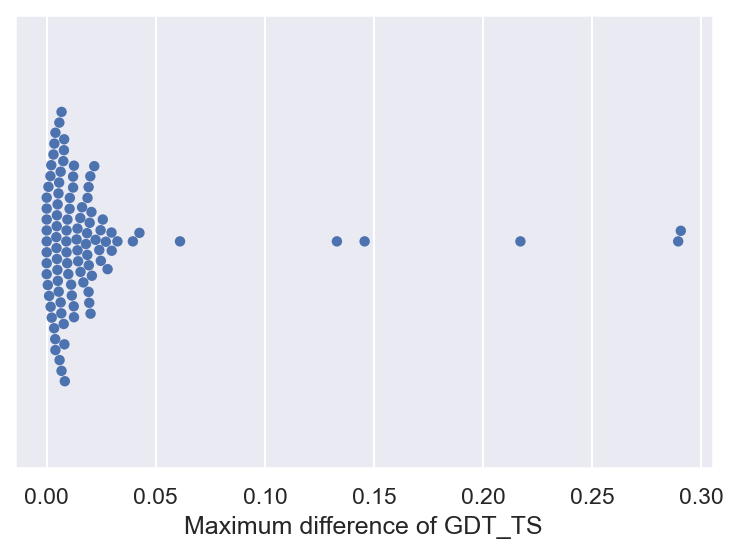

In [17]:
sns.swarmplot(df.groupby('target').apply(get_max_dif).sort_values())
plt.xlabel('Maximum difference of GDT_TS')

## performance evaluation for each number of domain

In [18]:
for name, group in df.groupby('Domain_num'):
    print(name)
    display(eval(group, columns=column_name, label_name='GDT_TS'))

2
83


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.769            0.542        4.910       0.327
1      positive(%)           0.791            0.571        4.328       0.177
2      coverage(%)           0.402            0.366       16.223       0.281
3             DOPE           0.803            0.706        2.338         NaN
4             SOAP           0.733            0.613        2.807         NaN
5           ProQ3D           0.814            0.723        3.017       0.096
6            SBROD           0.777            0.678        3.892         NaN
7       DeepAccNet           0.852            0.730        2.829       0.198
8  DeepAccNet-Bert           0.877            0.790        2.736       0.138
9           P3CMQA           0.877            0.799        1.736       0.075

3
15


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.874            0.591        5.063       0.282
1      positive(%)           0.871            0.604        5.123       0.143
2      coverage(%)           0.543            0.485       14.947       0.296
3             DOPE           0.834            0.759        3.289         NaN
4             SOAP           0.760            0.651        3.627         NaN
5           ProQ3D           0.816            0.724        7.132       0.095
6            SBROD           0.812            0.671        2.608         NaN
7       DeepAccNet           0.874            0.756        3.032       0.176
8  DeepAccNet-Bert           0.896            0.781        2.798       0.164
9           P3CMQA           0.906            0.815        2.955       0.078

4
2


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.906            0.622        2.486       0.241
1      positive(%)           0.907            0.614        2.486       0.111
2      coverage(%)           0.449            0.497       27.234       0.376
3             DOPE           0.897            0.599        1.740         NaN
4             SOAP           0.919            0.648        2.365         NaN
5           ProQ3D           0.969            0.735        0.655       0.090
6            SBROD           0.936            0.646        3.145         NaN
7       DeepAccNet           0.966            0.741        3.490       0.176
8  DeepAccNet-Bert           0.964            0.752        3.490       0.149
9           P3CMQA           0.977            0.821        0.000       0.068

## get MQA performance for each target

In [19]:
import sys
sys.path.append('../../..')
from categorize_target_by_template_quality import categorize_target

comp_methods = column_name
# classify category based on identity, positive, and coverage
category_df = categorize_target(tmscore_df)
# get performance for each taget
eval_df = eval_get_df(df, columns=column_name, label_name='GDT_TS')
# merge target information
eval_df = pd.merge(eval_df, target_info_df, on='target', how='left')
eval_df = pd.merge(eval_df, category_df, on='target', how='left')
order_dict = dict(zip(comp_methods, range(len(comp_methods))))
eval_df['order'] = [order_dict[method] for method in eval_df['Method']]
eval_df = eval_df.sort_values(['target', 'order']).drop('order', axis=1).reset_index(drop=True)

eval_df.to_csv(score_dir / 'mqa_result_each_target.csv')
eval_df

100


target           Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  \
0    1FHU_A      identity(%)           0.855           -0.152        0.822   
1    1FHU_A      positive(%)           0.852           -0.011        0.822   
2    1FHU_A      coverage(%)           0.632            0.683        0.822   
3    1FHU_A             DOPE           0.911            0.678        0.170   
4    1FHU_A             SOAP           0.787            0.413        0.000   
..      ...              ...             ...              ...          ...   
995  6RI6_A           ProQ3D           0.978            0.660        3.570   
996  6RI6_A            SBROD           0.958            0.722        0.050   
997  6RI6_A       DeepAccNet           0.977            0.769        0.000   
998  6RI6_A  DeepAccNet-Bert           0.958            0.745        0.050   
999  6RI6_A           P3CMQA           0.995            0.817        0.050   

     GDT_TS MAE  Domain_num  seq_len identity_dist_category  \
0         0.301           2      320                    top   
1         0.154           2      320                    top   
2         0.383           2      320                    top   
3           NaN           2      320                    top   
4           NaN           2      320                    top   
..          ...         ...      ...                    ...   
995       0.112           3      498                    top   
996         NaN           3      498                    top   
997       0.190           3      498                    top   
998       0.171           3      498                    top   
999       0.027           3      498                    top   

    identity_quality_category positive_dist_category  \
0                        High                    top   
1                        High                    top   
2                        High                    top   
3                        High                    top   
4                        High                    top   
..                        ...                    ...   
995                    Middle             the others   
996                    Middle             the others   
997                    Middle             the others   
998                    Middle             the others   
999                    Middle             the others   

    positive_quality_category coverage_dist_category  
0                        High             the others  
1                        High             the others  
2                        High             the others  
3                        High             the others  
4                        High             the others  
..                        ...                    ...  
995                      High             the others  
996                      High             the others  
997                      High             the others  
998                      High             the others  
999                      High             the others  

[1000 rows x 13 columns]

## Conduct statistical test

In [20]:
from eval import stat_test

def stat_test_display(eval_df):
    base_method = 'identity(%)'
    metrics_list = ['GDT_TS Pearson', 'GDT_TS Spearman', 'GDT_TS Loss', 'GDT_TS MAE']
    pd.options.display.float_format = '{:.2e}'.format
    display(stat_test(eval_df, base_method, column_name, metrics_list))
    pd.options.display.float_format = '{:.3f}'.format

In [21]:
stat_test_display(eval_df)

Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)             NaN              NaN          NaN         NaN
1      positive(%)        1.51e-03         3.14e-03     4.75e-02    4.27e-18
2      coverage(%)        2.40e-16         1.52e-05     6.64e-10    1.72e-02
3             DOPE        2.61e-01         4.08e-08     3.07e-03         NaN
4             SOAP        1.17e-03         9.15e-03     1.03e-03         NaN
5           ProQ3D        7.55e-02         7.55e-08     1.65e-02    8.27e-18
6            SBROD        2.88e-01         8.14e-05     6.06e-02         NaN
7       DeepAccNet        6.35e-09         1.31e-10     2.52e-02    2.71e-17
8  DeepAccNet-Bert        4.66e-10         6.60e-14     7.28e-04    1.41e-17
9           P3CMQA        4.90e-11         2.34e-15     4.26e-05    7.56e-18

## Plot for each class

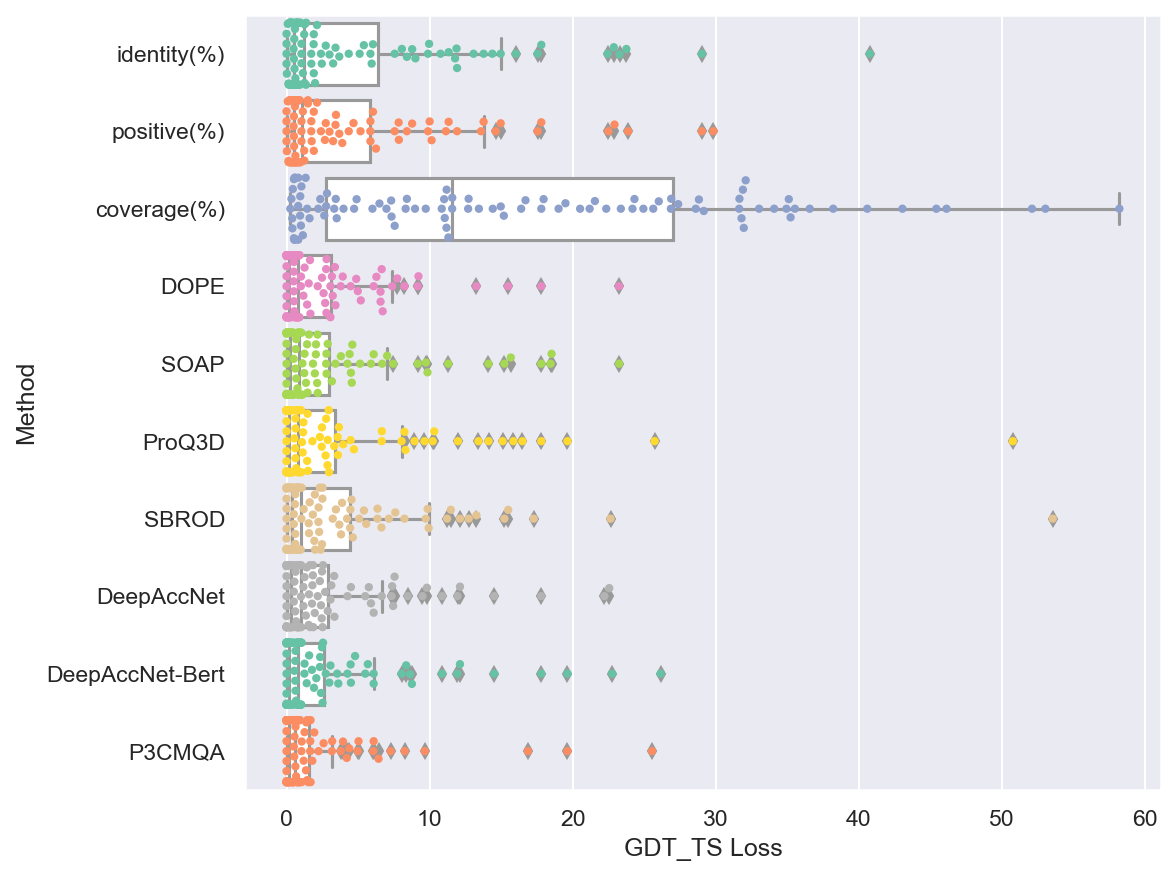

In [22]:
metrics = 'GDT_TS Loss'
hue = None
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), order=column_name)
plt.savefig(plot_dir / 'gdtts_loss_boxplot.png')

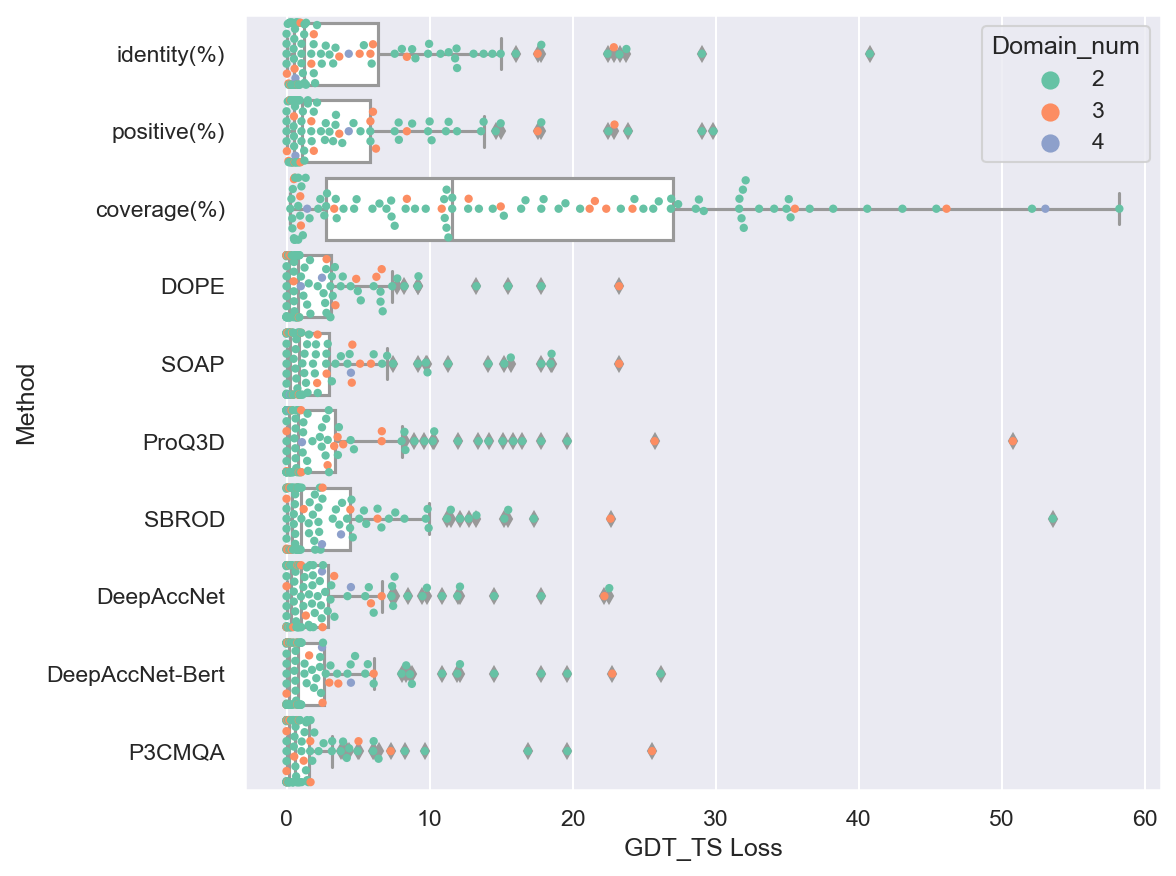

In [23]:
metrics = 'GDT_TS Loss'
hue = 'Domain_num'
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), order=column_name)
plt.savefig(plot_dir / 'gdtts_loss_boxplot_each_class.png')

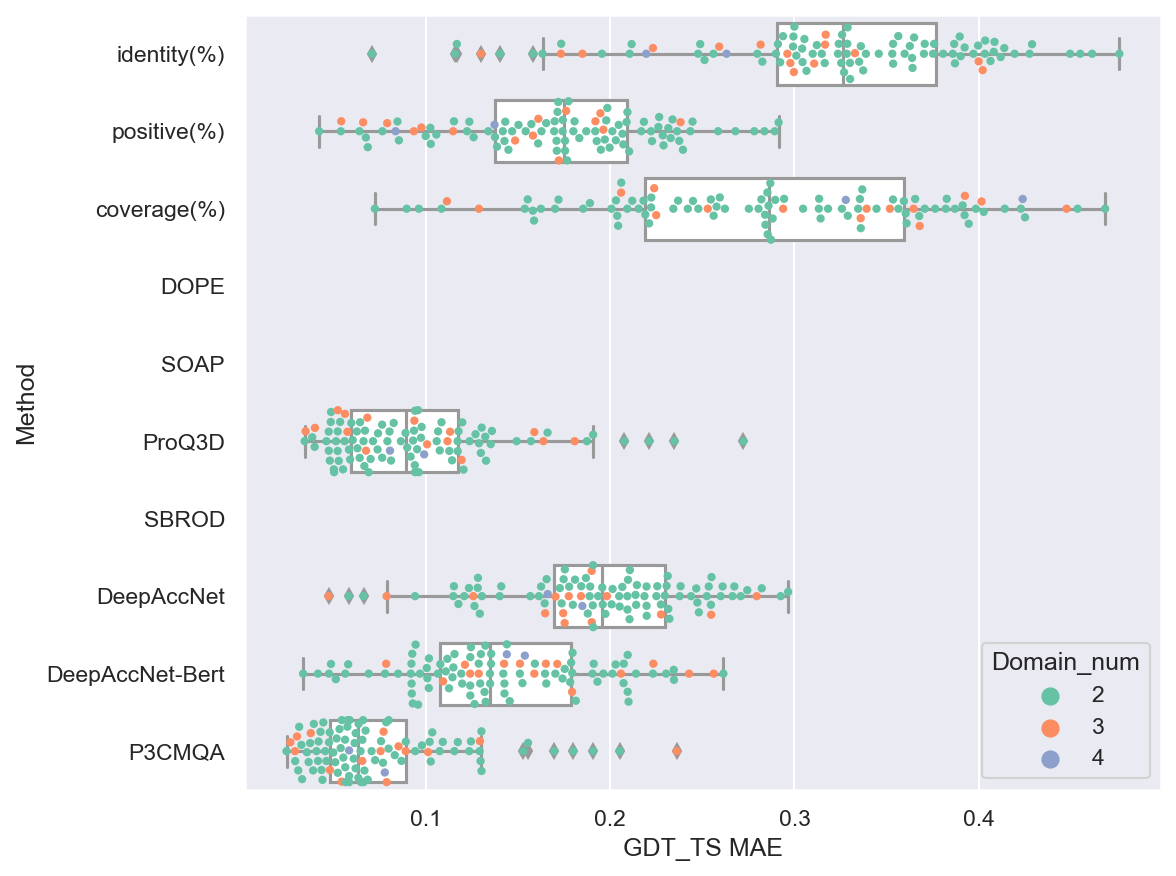

In [24]:
metrics = 'GDT_TS MAE'
hue = 'Domain_num'
outrange_methods = ['dope', 'soap', 'sbrod']
order = [method for method in column_name if method not in outrange_methods]
plot_metrics_group(eval_df.query('Method not in @outrange_methods'), metrics=metrics, hue=hue, figsize=(8, 6), order=order)
plt.savefig(plot_dir / 'gdtts_MAE_boxplot_each_class.png')

## Group by identity

In [25]:
category_df

identity_dist_category identity_quality_category  \
target                                                    
1FHU_A                    top                      High   
1GU7_A             the others                       Low   
1HM9_B             the others                       Low   
1K5N_A             the others                      High   
1L3K_A              multi top                      High   
...                       ...                       ...   
6D0A_A             the others                       Low   
6FME_B             the others                       Low   
6G7N_A              multi top                    Middle   
6HOA_A             the others                      High   
6RI6_A                    top                    Middle   

       positive_dist_category positive_quality_category coverage_dist_category  
target                                                                          
1FHU_A                    top                      High             the others  
1GU7_A             the others                       Low             the others  
1HM9_B             the others                    Middle             the others  
1K5N_A             the others                      High             the others  
1L3K_A             the others                      High             the others  
...                       ...                       ...                    ...  
6D0A_A             the others                       Low             the others  
6FME_B             the others                       Low             the others  
6G7N_A              multi top                    Middle             the others  
6HOA_A             the others                      High             the others  
6RI6_A             the others                      High             the others  

[100 rows x 5 columns]

In [26]:
for column in category_df.columns:
    print(category_df.value_counts(column))

identity_dist_category
the others    46
multi top     34
top           20
dtype: int64
identity_quality_category
Middle    37
Low       32
High      31
dtype: int64
positive_dist_category
the others    45
multi top     38
top           17
dtype: int64
positive_quality_category
High      47
Middle    34
Low       19
dtype: int64
coverage_dist_category
the others    94
multi top      4
top            2
dtype: int64


In [27]:
concat_df = pd.merge(df, category_df, left_on='target', right_index=True)
concat_df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
105    1FHU_A_2PS2_A_3_3   0.452   0.265    0.649  1FHU_A  2PS2_A_3      320   
106    1FHU_A_4MGG_A_3_4   0.494   0.309    0.657  1FHU_A  4MGG_A_3      320   
107    1FHU_A_1WUF_A_3_3   0.557   0.353    0.752  1FHU_A  1WUF_A_3      320   
108    1FHU_A_3Q45_A_3_2   0.572   0.370    0.758  1FHU_A  3Q45_A_3      320   
109    1FHU_A_3GC2_A_1_2   0.972   0.865    0.986  1FHU_A  3GC2_A_1      320   
...                  ...     ...     ...      ...     ...       ...      ...   
17831  6RI6_A_5A7E_A_1_3   0.954   0.873    0.982  6RI6_A  5A7E_A_1      498   
17832  6RI6_A_5A7E_A_2_4   0.960   0.886    0.986  6RI6_A  5A7E_A_2      498   
17833  6RI6_A_4A2F_A_1_5   0.955   0.872    0.981  6RI6_A  4A2F_A_1      498   
17834  6RI6_A_2HRG_A_2_1   0.961   0.890    0.985  6RI6_A  2HRG_A_2      498   
17835  6RI6_A_2XYB_A_2_4   0.960   0.878    0.986  6RI6_A  2XYB_A_2      498   

       identity  positive  coverage  ...  SBROD  ProQ2D  ProQRosCenD  \
105          53       102       282  ...  1.468   0.481        0.469   
106          56       107       278  ...  1.418   0.459        0.451   
107          54       114       299  ...  1.510   0.472        0.552   
108          61       108       301  ...  1.461   0.511        0.545   
109         276       291       319  ...  1.707   0.694        0.762   
...         ...       ...       ...  ...    ...     ...          ...   
17831       338       387       490  ...  1.836   0.700        0.759   
17832       335       382       494  ...  1.851   0.704        0.763   
17833       339       386       490  ...  1.855   0.682        0.749   
17834       333       383       494  ...  1.854   0.673        0.745   
17835       330       377       492  ...  1.846   0.676        0.740   

       ProQRosFAD ProQ3D identity_dist_category  identity_quality_category  \
105         0.527  0.467                    top                       High   
106         0.556  0.457                    top                       High   
107         0.633  0.526                    top                       High   
108         0.696  0.607                    top                       High   
109         0.934  0.821                    top                       High   
...           ...    ...                    ...                        ...   
17831       0.925  0.812                    top                     Middle   
17832       0.933  0.828                    top                     Middle   
17833       0.932  0.823                    top                     Middle   
17834       0.924  0.818                    top                     Middle   
17835       0.919  0.805                    top                     Middle   

      positive_dist_category  positive_quality_category  \
105                      top                       High   
106                      top                       High   
107                      top                       High   
108                      top                       High   
109                      top                       High   
...                      ...                        ...   
17831             the others                       High   
17832             the others                       High   
17833             the others                       High   
17834             the others                       High   
17835             the others                       High   

       coverage_dist_category  
105                the others  
106                the others  
107                the others  
108                the others  
109                the others  
...                       ...  
17831              the others  
17832              the others  
17833              the others  
17834              the others  
17835              the others  

[14040 rows x 48 columns]

In [28]:
# based on identity distribution
methods = ['identity(%)', 'positive(%)', 'coverage(%)', 'DeepAccNet-Bert', 'P3CMQA']
for name, group in concat_df.groupby('identity_dist_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

multi top
34


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.854            0.575        3.067       0.324
1      positive(%)           0.867            0.609        2.900       0.175
2      coverage(%)           0.417            0.389       18.513       0.286
3  DeepAccNet-Bert           0.925            0.803        2.624       0.144
4           P3CMQA           0.906            0.810        2.275       0.078

the others
46


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.720            0.595        8.026       0.315
1      positive(%)           0.746            0.608        7.118       0.170
2      coverage(%)           0.410            0.379       14.286       0.277
3  DeepAccNet-Bert           0.833            0.773        3.639       0.151
4           P3CMQA           0.862            0.797        2.027       0.067

top
20


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.829            0.410        0.751       0.316
1      positive(%)           0.837            0.452        0.751       0.167
2      coverage(%)           0.470            0.400       16.930       0.303
3  DeepAccNet-Bert           0.920            0.798        0.972       0.119
4           P3CMQA           0.895            0.798        0.890       0.090

In [29]:
# based on identity distribution
limited_methods = ['identity(%)', 'positive(%)', 'DeepAccNet-Bert', 'P3CMQA']
for name, group in concat_df.groupby('identity_dist_category'):
    print(name)
    display(eval(group, columns=limited_methods, label_name='GDT_TS').rename({'GDT_TS Loss': 'Loss', 'GDT_TS Pearson': 'Pearson'}, axis=1)[['Method', 'Loss', 'Pearson']])

multi top
34


Method  Loss  Pearson
0      identity(%) 3.067    0.854
1      positive(%) 2.900    0.867
2  DeepAccNet-Bert 2.624    0.925
3           P3CMQA 2.275    0.906

the others
46


Method  Loss  Pearson
0      identity(%) 8.026    0.720
1      positive(%) 7.118    0.746
2  DeepAccNet-Bert 3.639    0.833
3           P3CMQA 2.027    0.862

top
20


Method  Loss  Pearson
0      identity(%) 0.751    0.829
1      positive(%) 0.751    0.837
2  DeepAccNet-Bert 0.972    0.920
3           P3CMQA 0.890    0.895

In [30]:
# based on identity quality
for name, group in concat_df.groupby('identity_quality_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

High
31


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.811            0.487        3.290       0.281
1      positive(%)           0.824            0.513        2.680       0.151
2      coverage(%)           0.459            0.379       17.769       0.259
3  DeepAccNet-Bert           0.873            0.756        2.941       0.142
4           P3CMQA           0.864            0.768        2.495       0.082

Low
32


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.723            0.552        6.443       0.354
1      positive(%)           0.758            0.582        5.502       0.189
2      coverage(%)           0.359            0.360       17.321       0.318
3  DeepAccNet-Bert           0.881            0.813        1.854       0.138
4           P3CMQA           0.886            0.832        1.001       0.067

Middle
37


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.823            0.603        4.874       0.319
1      positive(%)           0.830            0.626        4.916       0.172
2      coverage(%)           0.451            0.416       14.057       0.278
3  DeepAccNet-Bert           0.889            0.793        3.393       0.146
4           P3CMQA           0.898            0.805        2.136       0.077

In [31]:
# based on maximum identity value
for name, group in concat_df.groupby('identity_quality_category'):
    print(name)
    display(eval(group, columns=limited_methods, label_name='GDT_TS').rename({'GDT_TS Loss': 'Loss', 'GDT_TS Pearson': 'Pearson'}, axis=1)[['Method', 'Loss', 'Pearson']])

High
31


Method  Loss  Pearson
0      identity(%) 3.290    0.811
1      positive(%) 2.680    0.824
2  DeepAccNet-Bert 2.941    0.873
3           P3CMQA 2.495    0.864

Low
32


Method  Loss  Pearson
0      identity(%) 6.443    0.723
1      positive(%) 5.502    0.758
2  DeepAccNet-Bert 1.854    0.881
3           P3CMQA 1.001    0.886

Middle
37


Method  Loss  Pearson
0      identity(%) 4.874    0.823
1      positive(%) 4.916    0.830
2  DeepAccNet-Bert 3.393    0.889
3           P3CMQA 2.136    0.898

In [32]:
# based on identity distribution
for name, group in concat_df.groupby('identity_dist_category'):
    # print(name)
    for _name, _group in group.groupby('identity_quality_category'):
        # if _name != 'High':
        #     continue
        print(name, _name)
        display(eval(_group, columns=methods, label_name='GDT_TS'))

multi top High
11


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.874            0.537        2.317       0.285
1      positive(%)           0.893            0.544        2.290       0.156
2      coverage(%)           0.524            0.439       16.255       0.245
3  DeepAccNet-Bert           0.944            0.748        2.639       0.161
4           P3CMQA           0.923            0.795        4.692       0.076

multi top Low
6


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.804            0.436        2.188       0.335
1      positive(%)           0.803            0.501        1.307       0.186
2      coverage(%)           0.242            0.284       24.623       0.357
3  DeepAccNet-Bert           0.890            0.802        0.433       0.114
4           P3CMQA           0.874            0.781        1.118       0.072

multi top Middle
17


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.859            0.649        3.862       0.345
1      positive(%)           0.872            0.690        3.857       0.183
2      coverage(%)           0.409            0.394       17.817       0.287
3  DeepAccNet-Bert           0.924            0.839        3.387       0.143
4           P3CMQA           0.906            0.830        1.120       0.081

the others High
10


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.703            0.613        7.219       0.254
1      positive(%)           0.704            0.594        5.356       0.144
2      coverage(%)           0.431            0.365       12.277       0.204
3  DeepAccNet-Bert           0.735            0.711        5.182       0.159
4           P3CMQA           0.788            0.727        1.582       0.067

the others Low
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.699            0.569        7.706       0.354
1      positive(%)           0.744            0.595        6.713       0.186
2      coverage(%)           0.386            0.367       15.685       0.313
3  DeepAccNet-Bert           0.878            0.816        2.269       0.141
4           P3CMQA           0.885            0.840        1.013       0.065

the others Middle
11


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.784            0.638        9.488       0.284
1      positive(%)           0.788            0.650        9.638       0.156
2      coverage(%)           0.444            0.421       12.935       0.261
3  DeepAccNet-Bert           0.822            0.730        5.349       0.165
4           P3CMQA           0.878            0.765        4.735       0.071

top High
10


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.850            0.307        0.431       0.302
1      positive(%)           0.867            0.399        0.431       0.154
2      coverage(%)           0.415            0.328       24.926       0.329
3  DeepAccNet-Bert           0.933            0.812        1.032       0.105
4           P3CMQA           0.874            0.778        0.991       0.104

top Low
1


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.847            0.851        0.388       0.476
1      positive(%)           0.855            0.761        0.388       0.278
2      coverage(%)           0.395            0.639       14.410       0.222
3  DeepAccNet-Bert           0.926            0.816        0.000       0.191
4           P3CMQA           0.977            0.937        0.000       0.066

top Middle
9


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.804            0.475        1.146       0.315
1      positive(%)           0.803            0.478        1.146       0.169
2      coverage(%)           0.540            0.453        8.326       0.284
3  DeepAccNet-Bert           0.906            0.781        1.013       0.127
4           P3CMQA           0.909            0.805        0.878       0.077

In [33]:
for name, group in concat_df.groupby('positive_dist_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

multi top
38


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.846            0.585        2.993       0.333
1      positive(%)           0.864            0.626        2.883       0.181
2      coverage(%)           0.417            0.382       17.300       0.289
3  DeepAccNet-Bert           0.929            0.813        2.037       0.144
4           P3CMQA           0.912            0.816        1.602       0.072

the others
45


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.721            0.587        8.076       0.302
1      positive(%)           0.742            0.593        7.114       0.161
2      coverage(%)           0.412            0.388       14.413       0.275
3  DeepAccNet-Bert           0.823            0.757        4.026       0.148
4           P3CMQA           0.853            0.784        2.574       0.072

top
17


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.831            0.381        0.668       0.328
1      positive(%)           0.841            0.427        0.668       0.174
2      coverage(%)           0.470            0.393       18.776       0.305
3  DeepAccNet-Bert           0.931            0.815        1.028       0.121
4           P3CMQA           0.900            0.816        0.688       0.091

In [34]:
for name, group in concat_df.groupby('positive_quality_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

High
47


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.829            0.554        3.271       0.295
1      positive(%)           0.842            0.577        2.876       0.162
2      coverage(%)           0.496            0.426       14.939       0.255
3  DeepAccNet-Bert           0.880            0.768        2.855       0.151
4           P3CMQA           0.882            0.785        1.946       0.077

Low
19


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.663            0.492        6.786       0.344
1      positive(%)           0.728            0.561        6.184       0.180
2      coverage(%)           0.276            0.269       18.735       0.336
3  DeepAccNet-Bert           0.869            0.812        2.392       0.137
4           P3CMQA           0.893            0.837        1.017       0.066

Middle
34


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.800            0.580        6.054       0.337
1      positive(%)           0.797            0.587        5.540       0.177
2      coverage(%)           0.407            0.398       16.679       0.299
3  DeepAccNet-Bert           0.892            0.802        2.836       0.133
4           P3CMQA           0.880            0.805        2.282       0.077

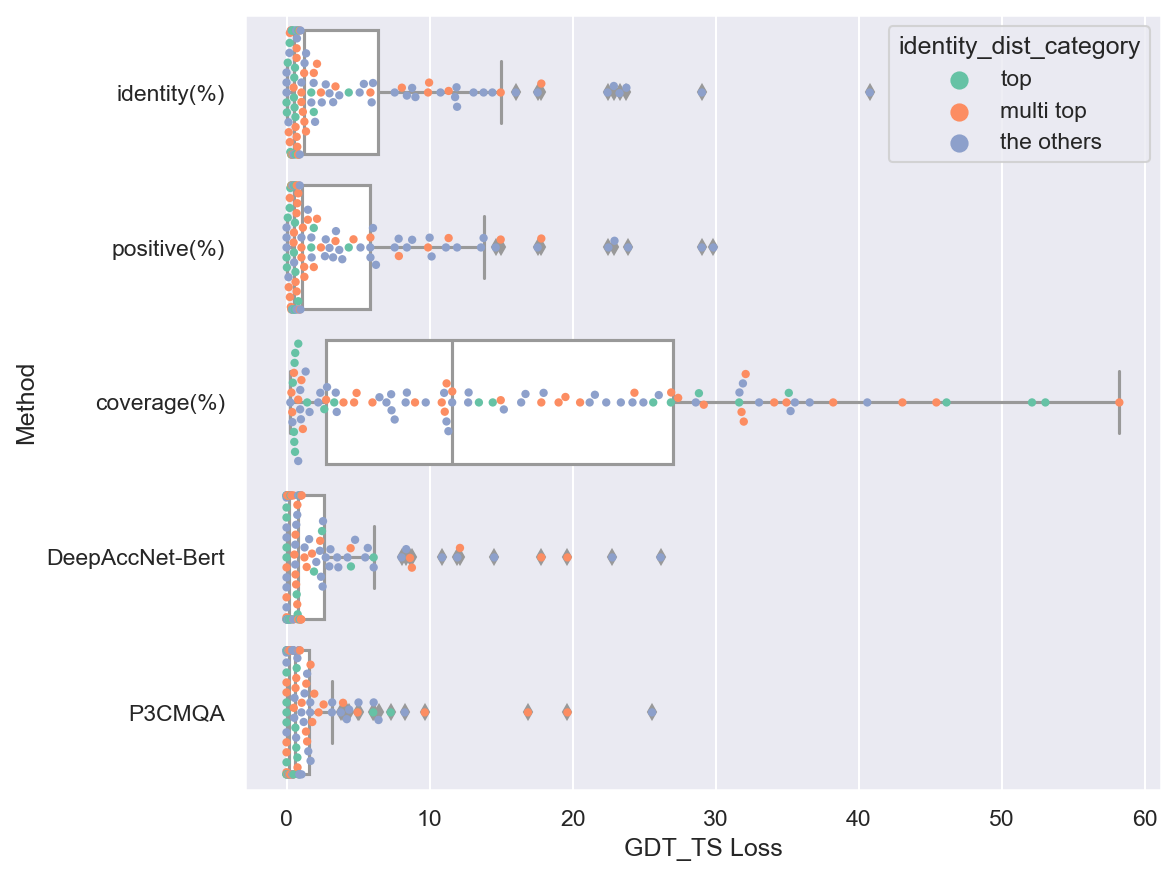

In [35]:
# for each identity dist category
metrics = 'GDT_TS Loss'
hue = 'identity_dist_category'
dist_order = ['top', 'multi top', 'the others']
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), pointsize=4, order=methods, hue_order=dist_order)

<AxesSubplot:xlabel='GDT_TS Loss', ylabel='target'>

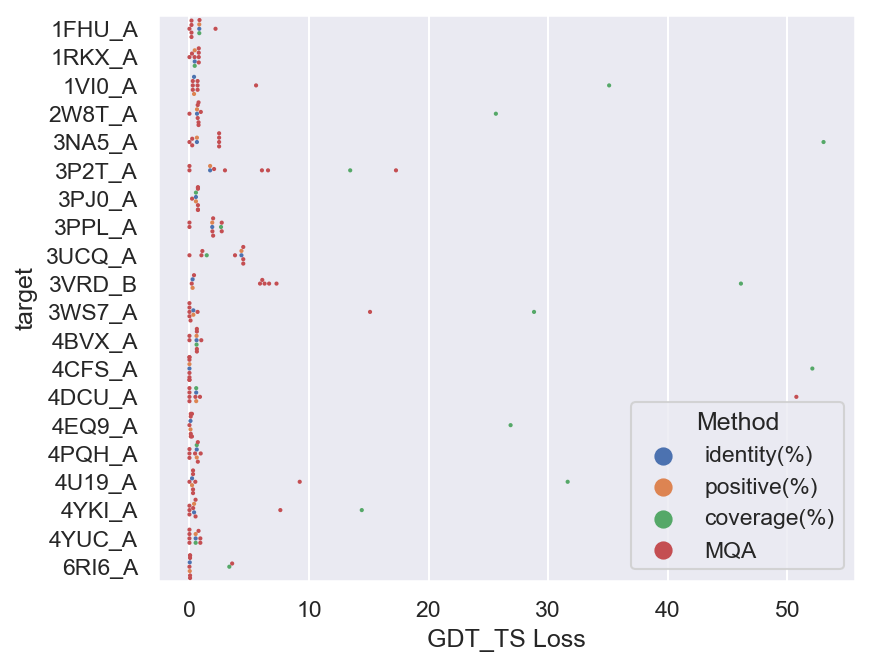

In [36]:
plt.figure(figsize=(6, 5))
identity_top_df = eval_df.query('identity_dist_category == "top"')
x = 'GDT_TS Loss'
templated_quality_metrics = ['identity(%)', 'positive(%)', 'coverage(%)']
identity_top_df_copy = identity_top_df.copy()
identity_top_df_copy['Method'] = [method if method in templated_quality_metrics else 'MQA' for method in identity_top_df['Method']]
sns.swarmplot(data=identity_top_df_copy, x=x, y='target', hue='Method', size=2)

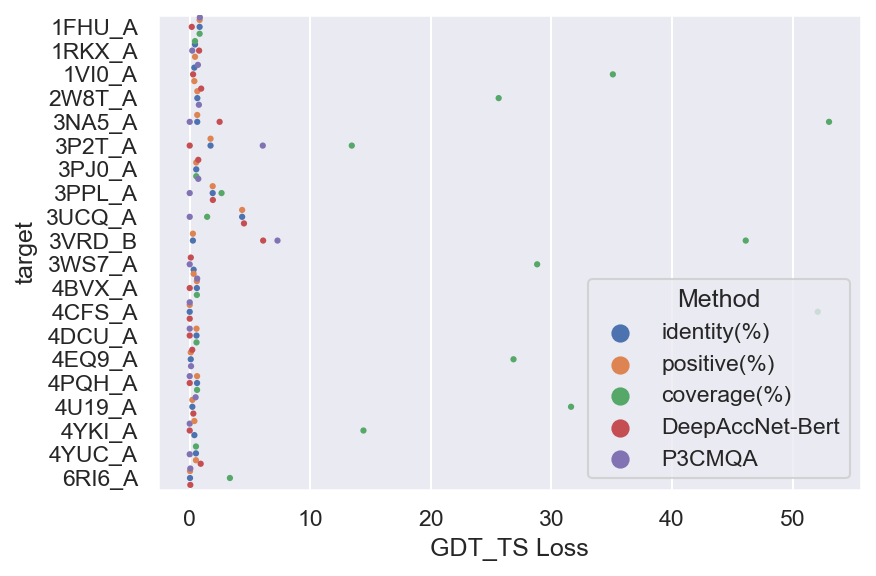

In [37]:
# based on identity distribution
x = 'GDT_TS Loss'
sns.swarmplot(data=identity_top_df, x=x, y='target', hue='Method', hue_order=methods, size=3)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_identity_dist_category_top_5methods.png')

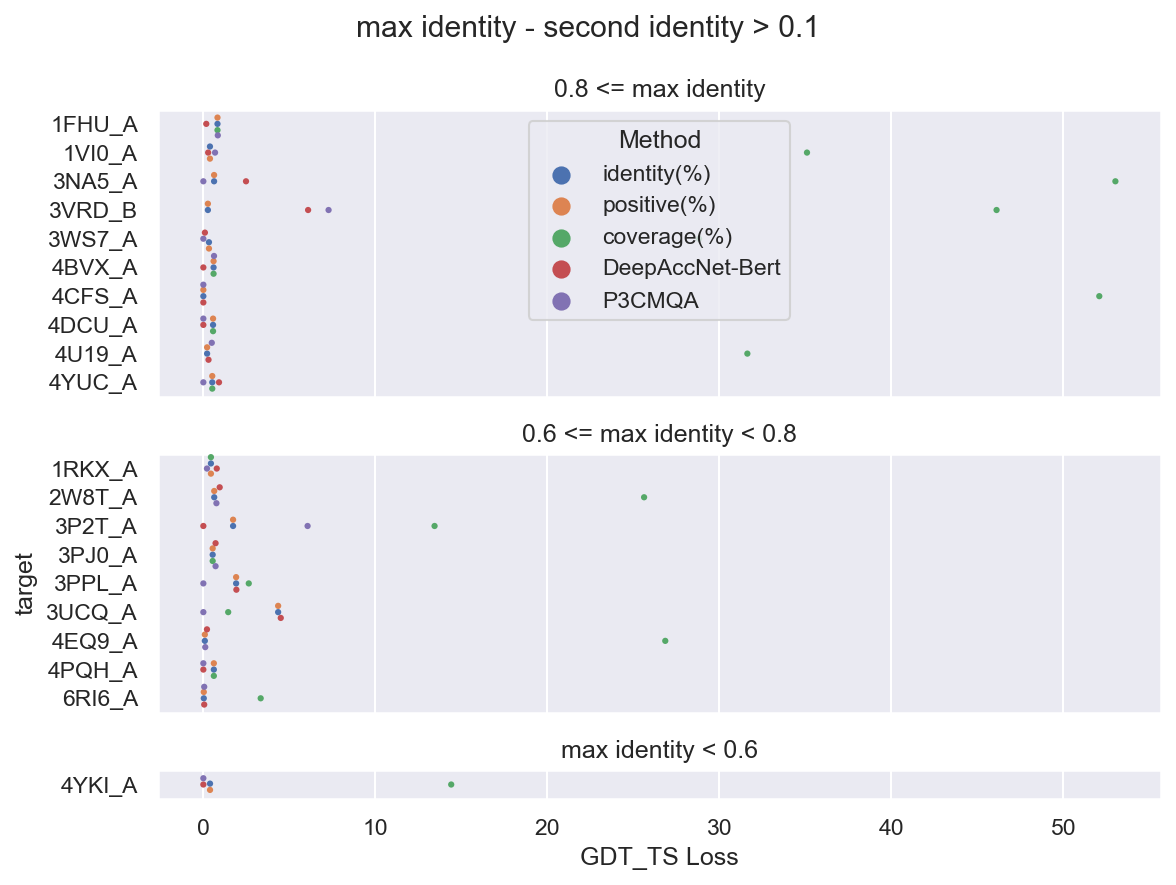

In [38]:
figsize = (8, 6)
data = identity_top_df
cateogry_label = 'identity_quality_category'
categories = ["High", "Middle", "Low"]
hue_order = methods
ratios = list(data.query('Method == @hue_order').value_counts(cateogry_label)[categories])
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=figsize, gridspec_kw={'height_ratios': ratios})
x = 'GDT_TS Loss'
y = 'target'
hue = 'Method'
hue_order = methods
size = 3
titles = ['0.8 <= max identity', '0.6 <= max identity < 0.8', 'max identity < 0.6']
for i, category in enumerate(categories):
    sns.swarmplot(data=data.query('{} == @category'.format(cateogry_label)), x=x, y=y, hue=hue, hue_order=hue_order, size=size, ax=axes[i])
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].get_legend().remove()
    if i != 1:
        axes[i].set_ylabel('')
    if i != 2:
        axes[i].set_xlabel('')
fig.suptitle('max identity - second identity > 0.1')
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_identity_dist_top_identity_quality_5methods.png')

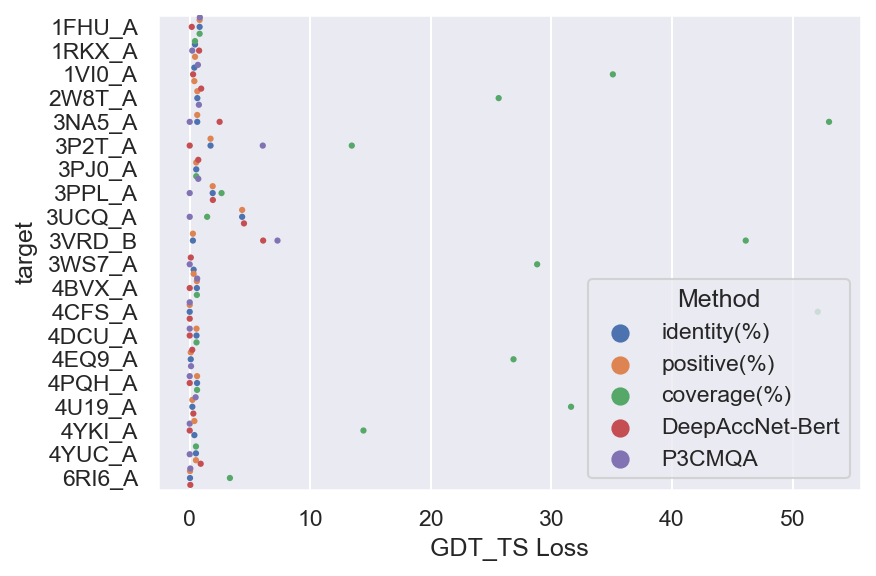

In [39]:
# based on identity distribution
x = 'GDT_TS Loss'
sns.swarmplot(data=identity_top_df, x=x, y='target', hue='Method', hue_order=methods, size=3)
plt.tight_layout()
# plt.savefig(plot_dir / 'gdtts_loss_identity_dist_category_top_5methods.png')

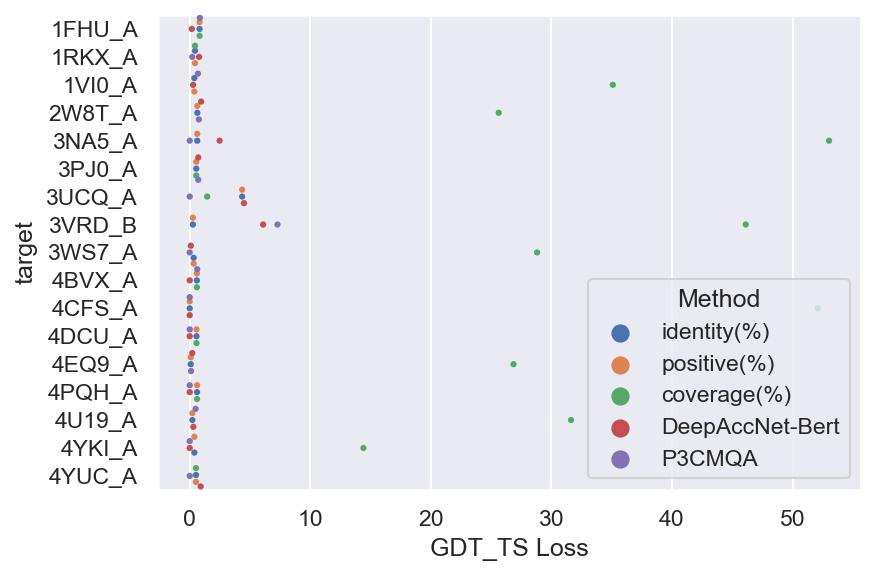

In [40]:
# based on positive distribution
x = 'GDT_TS Loss'
data = eval_df.query('positive_dist_category == "top"')
sns.swarmplot(data=data, x=x, y='target', hue='Method', hue_order=methods, size=3)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_positive_dist_category_top_5methods.png')

## Scatter plot of P3CMQA

In [41]:
scatter(df, x='GDT_TS', y='P3CMQA', col_wrap=10)
plt.savefig(plot_dir / 'p3cmqa_gdtts_scatter.png')